In [4]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import requests
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key
import os

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | komsomolskiy
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | maiduguri
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | saint anthony
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | poum
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | yerkoy
Processing Record 20 of Set 1 | pouembout
Processing Record 21 of Set 1 | bowen
Processing Record 22 of Set 1 | paamiut
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | ponta do sol
Processing Record 2

Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | khani
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | hirara
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | natal
Processing Record 48 of Set 4 | seydi
Processing Record 49 of Set 4 | fort nelson
Processing Record 50 of Set 4 | hamilton
Processing Record 1 of Set 5 | berezovyy
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | sibiti
Processing Record 5 of Set 5 | tessalit
Processing Record 6 of Set 5 | marystown
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | iracoubo
Processing Record 10 of Set 5 | sayyan
Processing Record 11 of Set 5 | mudyuga
City not found. Skipping...
Processing Record 12 of Set 5 | georgetown
Processing Record 13 of Set 5 | dudinka
Processing Record 14 of Set 5 | sao raimundo nonato
Processing R

Processing Record 34 of Set 8 | palaikastron
Processing Record 35 of Set 8 | camalu
Processing Record 36 of Set 8 | marrakesh
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | lexington
Processing Record 39 of Set 8 | esperance
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | satitoa
City not found. Skipping...
Processing Record 42 of Set 8 | tooele
Processing Record 43 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | dakoro
Processing Record 46 of Set 8 | wadi maliz
Processing Record 47 of Set 8 | barabai
Processing Record 48 of Set 8 | talnakh
Processing Record 49 of Set 8 | san-pedro
Processing Record 50 of Set 8 | buariki
City not found. Skipping...
Processing Record 1 of Set 9 | berlevag
Processing Record 2 of Set 9 | usinsk
Processing Record 3 of Set 9 | abomey
Processing Record 4 of Set 9 | quatre cocos
Processing Record

Processing Record 16 of Set 12 | usevya
Processing Record 17 of Set 12 | cienfuegos
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | cervo
Processing Record 20 of Set 12 | naze
Processing Record 21 of Set 12 | sciacca
Processing Record 22 of Set 12 | dongying
Processing Record 23 of Set 12 | ambon
Processing Record 24 of Set 12 | vila franca do campo
Processing Record 25 of Set 12 | kalemie
Processing Record 26 of Set 12 | yoro
Processing Record 27 of Set 12 | wamba
Processing Record 28 of Set 12 | bolshoye nagatkino
Processing Record 29 of Set 12 | maceio
Processing Record 30 of Set 12 | alotau
City not found. Skipping...
Processing Record 31 of Set 12 | linxia
Processing Record 32 of Set 12 | yenagoa
Processing Record 33 of Set 12 | rocha
Processing Record 34 of Set 12 | dunedin
Processing Record 35 of Set 12 | probolinggo
Processing Record 36 of Set 12 | sorland
Processing Record 37 of Set 12 | hun
Processing Record 38 of Set 12 | kingsport
Processing Recor

In [8]:
len(city_data)

551

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,69.96,32,40,5.75,CA,2022-07-05 19:26:36
1,Komsomolskiy,40.4272,71.7189,72.32,30,0,0.00,UZ,2022-07-05 19:26:36
2,Vila Velha,-20.3297,-40.2925,78.75,78,20,14.97,BR,2022-07-05 19:26:37
3,Hermanus,-34.4187,19.2345,46.80,74,0,1.79,ZA,2022-07-05 19:26:37
4,Yellowknife,62.4560,-114.3525,73.92,28,0,10.36,CA,2022-07-05 19:26:38
5,Upernavik,72.7868,-56.1549,39.90,86,40,8.79,GL,2022-07-05 19:26:38
6,Maiduguri,11.8464,13.1603,90.90,39,98,8.32,NG,2022-07-05 19:26:38
7,Bluff,-46.6000,168.3333,45.81,67,93,21.05,NZ,2022-07-05 19:26:39
8,Kruisfontein,-34.0033,24.7314,56.88,93,100,3.83,ZA,2022-07-05 19:26:39
9,Albany,42.6001,-73.9662,76.39,70,100,8.95,US,2022-07-05 19:24:32


In [10]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-05 19:26:36,55.7435,-97.8558,69.96,32,40,5.75
1,Komsomolskiy,UZ,2022-07-05 19:26:36,40.4272,71.7189,72.32,30,0,0.00
2,Vila Velha,BR,2022-07-05 19:26:37,-20.3297,-40.2925,78.75,78,20,14.97
3,Hermanus,ZA,2022-07-05 19:26:37,-34.4187,19.2345,46.80,74,0,1.79
4,Yellowknife,CA,2022-07-05 19:26:38,62.4560,-114.3525,73.92,28,0,10.36
...,...,...,...,...,...,...,...,...,...
546,Eisiskes,LT,2022-07-05 19:38:37,54.1667,25.0000,61.65,82,100,5.75
547,Pescia,IT,2022-07-05 19:41:29,43.8970,10.6904,82.89,62,0,1.99
548,Point Pleasant,US,2022-07-05 19:40:29,40.0832,-74.0682,85.28,73,0,8.05
549,Port Hedland,AU,2022-07-05 19:41:30,-20.3167,118.5667,50.05,46,6,9.22


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Read csv file
file_to_load = os.path.join("weather_data","cities.csv")
city_data_df = pd.read_csv(file_to_load)

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

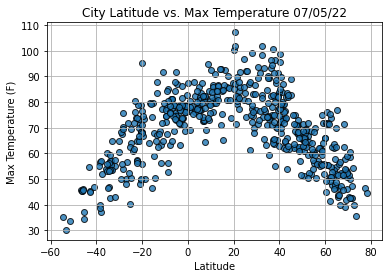

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

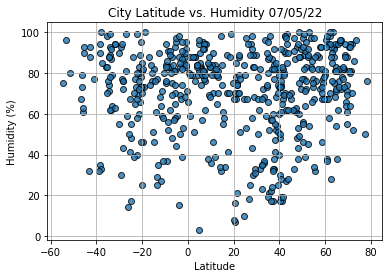

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

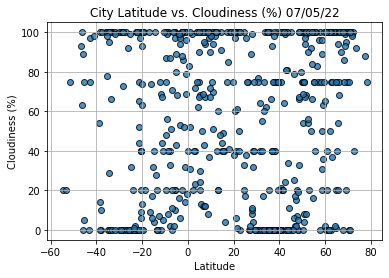

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

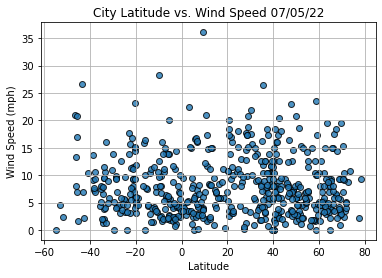

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()